In [1]:
import bz2
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk


In [ ]:
# Download dataset from https://www.kaggle.com/datasets/bittlingmayer/amazonreviews

In [2]:
output_path='output/test.ft.txt'
with bz2.open('data/test.ft.txt.bz2', 'rt', encoding='utf-8') as compressed_file, open(output_path, 'w', encoding='utf-8') as output_file:
    for line in compressed_file:
        output_file.write(line)
    print('Test Successful ')

output_path='output/train.ft.txt'
with bz2.open('data/train.ft.txt.bz2', 'rt', encoding='utf-8') as compressed_file, open(output_path, 'w', encoding='utf-8') as output_file:
    for line in compressed_file:
        output_file.write(line)
    print('Train Successful ')

Test Successful 
Train Successful 


In [2]:
train,test,train_label,test_label=[],[],[],[]
with open('output/train.ft.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
for line in tqdm(lines):
    train.append(line.split('__label__')[1][1:])
    train_label.append(line.split('__label__')[1][0])
with open('output/test.ft.txt', 'r', encoding='utf-8') as file:
    lines = file.readlines()
for line in tqdm(lines):
    test.append(line.split('__label__')[1][1:])
    test_label.append(line.split('__label__')[1][0])

100%|██████████| 400000/400000 [00:00<00:00, 863328.39it/s]


In [3]:
train[0]

' Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^\n'

In [4]:
# Now, let's import this data into pandas DataFrames
train_df = pd.DataFrame({'text': train, 'label': train_label})
test_df = pd.DataFrame({'text': test, 'label': test_label})

In [5]:
train_df['label'][0]

'2'

## PreProcess

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Lowercasing and removing punctuation
    tokens = [word.lower() for word in tokens if word.isalnum()]
    
    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faiza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faiza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\faiza\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
example=train_df['text'][0]
print(example)

 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^



In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Stuning',
 'even',
 'for',
 'the',
 'non-gamer',
 ':',
 'This',
 'sound',
 'track',
 'was']

In [9]:
preprocess_text(example)[:10]

['stuning',
 'even',
 'sound',
 'track',
 'beautiful',
 'paint',
 'senery',
 'mind',
 'well',
 'would']

In [11]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download NLTK resources if not already downloaded
nltk.download('vader_lexicon')

# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Example usage
sentiment_scores = sid.polarity_scores(example)
print(sentiment_scores)


{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\faiza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## EDA

In [12]:
train_df.shape

(3600000, 2)

In [13]:
train_df['label'].unique()

array(['2', '1'], dtype=object)

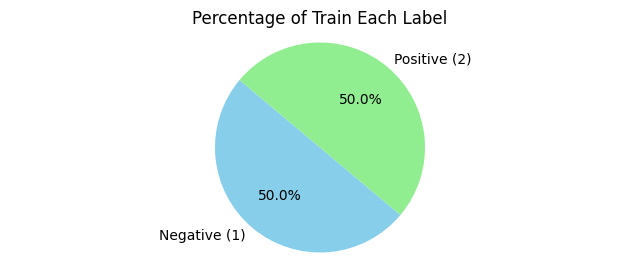

In [14]:
label_counts = train_df['label'].value_counts(normalize=True) * 100

# Define labels for the pie chart
labels = ['Negative (1)', 'Positive (2)']

# Plotting
plt.figure(figsize=(8, 3))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Percentage of Train Each Label')
plt.axis('equal') 

plt.show()


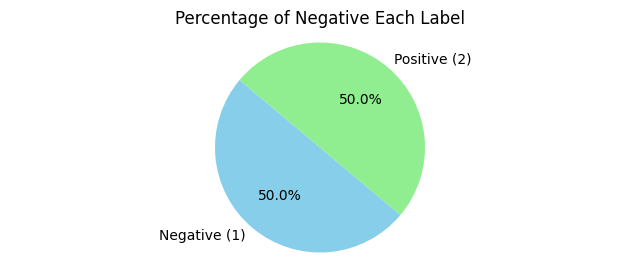

In [15]:
label_counts = test_df['label'].value_counts(normalize=True) * 100

# Define labels for the pie chart
labels = ['Negative (1)', 'Positive (2)']

# Plotting
plt.figure(figsize=(8, 3))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Percentage of Negative Each Label')
plt.axis('equal') 

plt.show()


### note
 1. Data is Balanced

## Model

In [1]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

c:\Users\faiza\Music\tut\nlp\sentimate\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [18]:
# VADER results on example
print(example)
sid.polarity_scores(example)

 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^



{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

In [63]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0006018789, 'roberta_neu': 0.0030538081, 'roberta_pos': 0.99634427}


In [64]:
output

SequenceClassifierOutput(loss=None, logits=tensor([[-2.7554, -1.1313,  4.6564]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

### Note
1. Sid doesnot have understanding relationship and context
2. roberta have  have understanding relationship and context

In [65]:
print(train_df['text'][0],
train_df['label'][0])

 Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^
 2


In [21]:
from transformers import Trainer, TrainingArguments
from sklearn.metrics import accuracy_score
import torch
from torch.utils.data import Dataset

In [23]:
tokenizer

RobertaTokenizerFast(name_or_path='cardiffnlp/twitter-roberta-base-sentiment', vocab_size=50265, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False, special=True),
}

### Taking Small Dataset for Training 

In [42]:
# taking small dataset for training
train_text = train_df['text'][0:100]
train_label = train_df['label'][0:100]
test_text = train_df['text'][0:10]
test_label = train_df['label'][0:10]

In [46]:
train_text[99]

' Caution!: These tracks are not the "original" versions but are re-recorded versions. So, whether the tracks are "remastered" or not is irrelevant.\n'

In [47]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = int(self.labels[idx])

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding="max_length",
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_dataset = CustomDataset(train_text, train_label, tokenizer, max_length=128)
test_dataset = CustomDataset(test_text, test_label, tokenizer, max_length=128)


In [48]:
# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir="./logs",
)

# Define the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=lambda pred: {"accuracy": accuracy_score(pred.label_ids, pred.predictions.argmax(-1))},
)


c:\Users\faiza\Music\tut\nlp\sentimate\env\Lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [49]:
trainer.train()

100%|██████████| 39/39 [05:18<00:00,  8.16s/it]

{'train_runtime': 318.3522, 'train_samples_per_second': 0.942, 'train_steps_per_second': 0.123, 'train_loss': 0.26884976411477113, 'epoch': 3.0}


TrainOutput(global_step=39, training_loss=0.26884976411477113, metrics={'train_runtime': 318.3522, 'train_samples_per_second': 0.942, 'train_steps_per_second': 0.123, 'train_loss': 0.26884976411477113, 'epoch': 3.0})

In [50]:
# Save the fine-tuned model
output_model_dir = "./fine_tuned_model"
model.save_pretrained(output_model_dir)
tokenizer.save_pretrained(output_model_dir)

('./fine_tuned_model\\tokenizer_config.json',
 './fine_tuned_model\\special_tokens_map.json',
 './fine_tuned_model\\vocab.json',
 './fine_tuned_model\\merges.txt',
 './fine_tuned_model\\added_tokens.json',
 './fine_tuned_model\\tokenizer.json')

## Load the model FINE TUNE MODEL

In [74]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [75]:

# Load the fine-tuned model and tokenizer
model_dir = "./fine_tuned_model"
tokenizer = AutoTokenizer.from_pretrained(model_dir)
model = AutoModelForSequenceClassification.from_pretrained(model_dir)

# Example text for prediction
text = "This is a packing is standard!"

# Tokenize the text
inputs = tokenizer(text, return_tensors="pt")

# Perform prediction
output = model(**inputs)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'Negative' : scores[0],
    'Netrual' : scores[1],
    'Postive' : scores[2]
}
print(scores_dict)




{'Negative': 0.005059136, 'Netrual': 0.7918837, 'Postive': 0.20305713}


In [73]:

# Find the key corresponding to the maximum value
max_key = max(scores_dict, key=scores_dict.get)

# Get the maximum value
max_value = scores_dict[max_key]

print("Maximum value:", max_value)
print("Key with maximum value:", max_key)


Maximum value: 0.7918837
Key with maximum value: Netrual
